In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


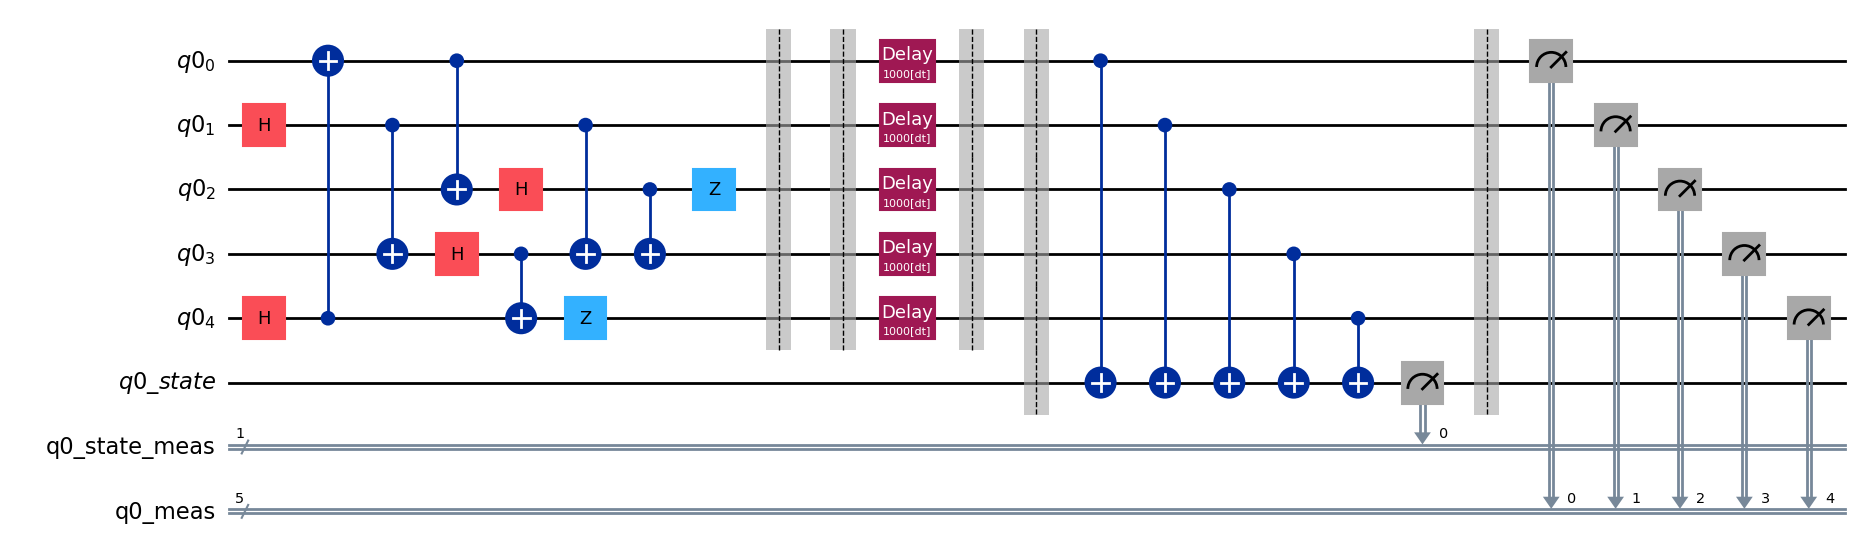

In [2]:


def load_circuit(delay):
    qc = FiveQbStabilizerCodeCircuit(1)

    qc.encode(type='0')

    qc.delay(delay)

    qc.measure(basis='Z')
    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [4]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [5]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 15
Transpiled Circuit Depth: 86


In [6]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [8]:
t_array = [t*2_000 for t in range(0, 6)] # brisbane
# t_array = [t*4_500 for t in range(0, 6)] # kyiv
print([round(t*dt * 10**(-3), 3) for t in t_array])
# t_array = [0]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [26]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=20,
                                initial_layout = [22, 15, 21, 23, 4, 20]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=6))
    

Circuit Depth: 75
Delay Duration: 0.0 us
Total Duration: 17.06 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 76
Delay Duration: 1.0 us
Total Duration: 18.06 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 76
Delay Duration: 2.0 us
Total Duration: 19.06 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 76
Delay Duration: 3.0 us
Total Duration: 20.06 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 76
Delay Duration: 4.0 us
Total Duration: 21.06 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 73
Delay Duration: 5.0 us
Total Duration: 22.0 us

[22, 15, 21, 23, 4, 20]


C:\Users\marzu\AppData\Local\Temp\ipykernel_41480\1804429668.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [10]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)

for lq in qc.qubits:

    state = lq.qb_measure
    # state = lq.all_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")

    state = lq.qb_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")


  q0_state_meas: {'0': 3200}
  q0_meas: {'10010': 208, '11011': 216, '11000': 206, '00110': 188, '10100': 199, '10111': 217, '01001': 214, '01111': 195, '11110': 199, '00101': 178, '01100': 188, '00011': 210, '10001': 218, '11101': 185, '00000': 183, '01010': 196}


In [ ]:
sampler = SamplerV2(backend=backend)
shots = 3200
job = sampler.run(circuits, shots=shots)
# job = service.job('cybyb9501rbg008jvz30') # sin delay, 1000 shots, t_array = [0]
# job = service.job('cyg4zexcw2k00088yh1g') # 3200 shots, t_array = [t*2_000 for t in range(0, 6)] -> transpilado sin delay
# job = service.job('cykzftz7v8tg008y4jv0') # kyiv, 3200 shots, t_array = [t*4_500 for t in range(0, 6)] -> transpilado sin delay
job = service.job('cys7tpjy9d80008d6dmg') # brisbane, 3200 shots, t_array = [t*2_000 for t in range(0, 6)]


pub_result = job.result()


In [12]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    logical_meas_results.append(result['__value__']['data']['q0_state_meas'].get_counts())



In [14]:

delays = [round(t*dt/1000) for t in t_array]


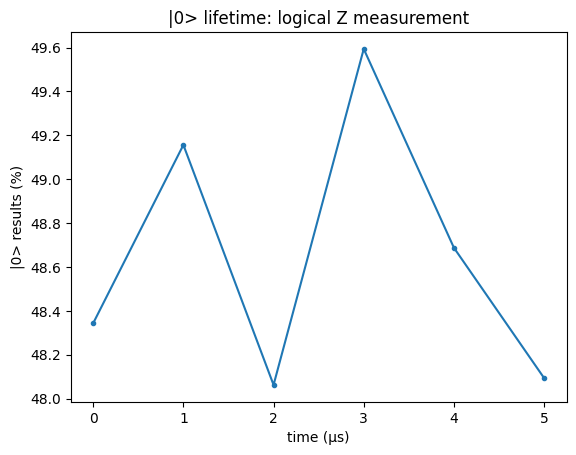

In [15]:
import matplotlib.pyplot as plt

x = delays

y = [logical_meas_results[i]['0']/shots*100 for i in range(len(x))]

plt.plot(x, y, '.-')

plt.xlabel('time (μs)')
plt.ylabel('|0> results (%)')
plt.title('|0> lifetime: logical Z measurement')

plt.show()

In [16]:

# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 107	 92	 108	 59	 74	 135	 52	 120	 171	 52	 115	 113	 81	 133	 142	 97	 66	 130	 79	 55	 118	 38	 65	 83	 191	 34	 177	 59	 24	 162	 89	 179
 1		 118	 84	 99	 99	 68	 126	 73	 89	 171	 78	 115	 148	 81	 153	 156	 74	 50	 97	 76	 75	 111	 38	 63	 69	 185	 36	 165	 77	 36	 198	 57	 135
 2		 133	 72	 89	 63	 99	 137	 70	 95	 186	 60	 113	 134	 83	 128	 152	 104	 54	 102	 85	 68	 125	 44	 64	 76	 159	 38	 156	 58	 45	 171	 75	 162
 3		 85	 85	 82	 58	 76	 102	 76	 92	 144	 34	 104	 145	 101	 127	 172	 98	 52	 138	 74	 79	 136	 52	 54	 86	 204	 25	 159	 61	 37	 152	 92	 218
 4		 112	 67	 100	 74	 49	 131	 82	 99	 171	 60	 110	 136	 82	 142	 143	 85	 56	 122	 96	 79	 98	 4

In [17]:
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]

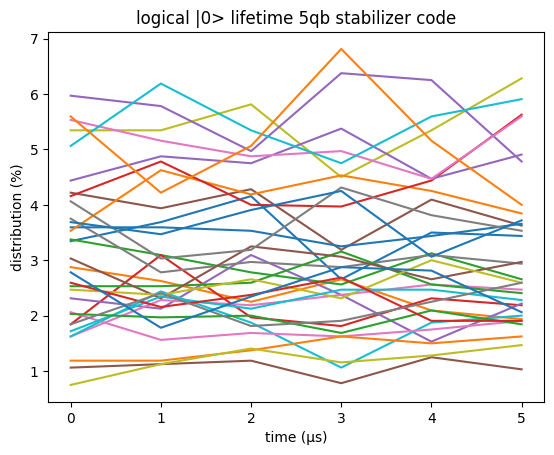

In [18]:
import matplotlib.pyplot as plt
import math

# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |0> lifetime 5qb stabilizer code')
# plt.legend()

# Display the plot
plt.show()

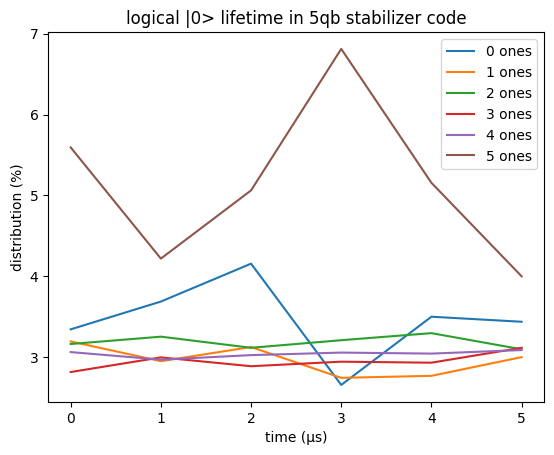

In [19]:

for n in [0,1,2,3,4,5]:

    n_ones_states = [s for s in states if sum([int(i) for i in s]) == n]
    plt.plot(x, [sum([r[s] for s in n_ones_states])/len(n_ones_states) for r in results], label=f"{n} ones")



# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |0> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

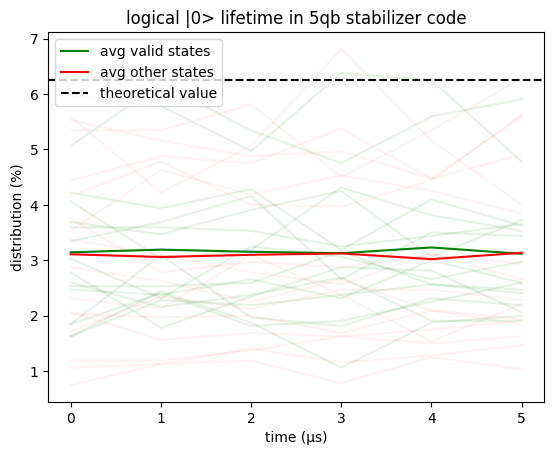

In [20]:

for s in states:
    y[s] = [r[s] for r in results]
    
    if s in valid_states:
        # if s == '00000':
        #     plt.plot(x, y[s], alpha=0.2, color='black')
        #     continue
        plt.plot(x, y[s], alpha=0.1, color='green')
    else:
        plt.plot(x, y[s], alpha=0.05, color='red')


plt.plot(x, [sum([r[s] for s in valid_states])/16 for r in results], label='avg valid states', color='green')
# plt.plot(x, [sum([r[s] for s in valid_states if s != '00000'])/15 for r in results], label='avg valid states', color='black')
plt.plot(x, [sum([r[s] for s in states if s not in valid_states])/16 for r in results], label='avg other states', color='red')

plt.axhline(y=100/16, color='k', linestyle='--', label='theoretical value')
    
# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |0> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

In [21]:
# plt.plot(x, [sum([r[s] for s in valid_states]) for r in results])

# # Add labels and title
# plt.xlabel('time (μs)')
# plt.ylabel('valid states distribution (%)')
# plt.title('logical |+> lifetime in 5qb stabilizer code')
# # plt.legend()

# # Display the plot
# plt.show()

TVD (final state)

In [22]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


In [23]:
print(alpha)

print([f"{s}: {results[0][s]/100}" for s in states])

{'00000': 0.0625, '00001': 0, '00010': 0, '00011': 0.0625, '00100': 0, '00101': 0.0625, '00110': 0.0625, '00111': 0, '01000': 0, '01001': 0.0625, '01010': 0.0625, '01011': 0, '01100': 0.0625, '01101': 0, '01110': 0, '01111': 0.0625, '10000': 0, '10001': 0.0625, '10010': 0.0625, '10011': 0, '10100': 0.0625, '10101': 0, '10110': 0, '10111': 0.0625, '11000': 0.0625, '11001': 0, '11010': 0, '11011': 0.0625, '11100': 0, '11101': 0.0625, '11110': 0.0625, '11111': 0}
['00000: 0.0334375', '00001: 0.02875', '00010: 0.03375', '00011: 0.0184375', '00100: 0.023125', '00101: 0.0421875', '00110: 0.01625', '00111: 0.0375', '01000: 0.0534375', '01001: 0.01625', '01010: 0.0359375', '01011: 0.0353125', '01100: 0.0253125', '01101: 0.0415625', '01110: 0.044375', '01111: 0.0303125', '10000: 0.020625', '10001: 0.040625', '10010: 0.0246875', '10011: 0.0171875', '10100: 0.036875', '10101: 0.011875', '10110: 0.0203125', '10111: 0.0259375', '11000: 0.0596875', '11001: 0.010625', '11010: 0.0553125', '11011: 0.01

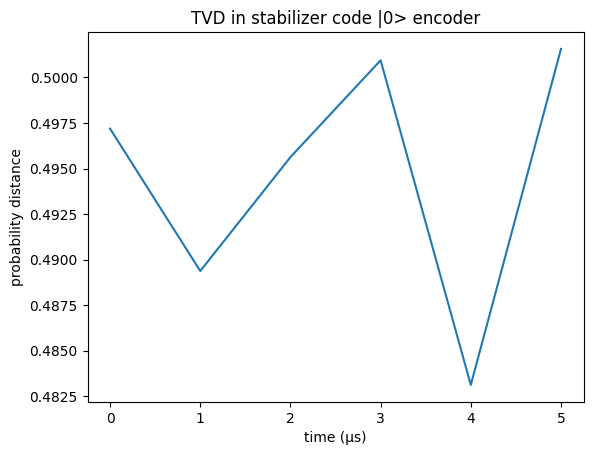

In [24]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in stabilizer code |0> encoder')

# Display the plot
plt.show()

In [25]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 48.31%


TVD (logical measurement)

In [ ]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {logical_meas_results[i]['1'] / shots*100}%")

{'0': 1547, '1': 1653}
TVD: 51.65625%
{'1': 1627, '0': 1573}
TVD: 50.84375%
{'1': 1662, '0': 1538}
TVD: 51.9375%
{'1': 1613, '0': 1587}
TVD: 50.40625%
{'1': 1642, '0': 1558}
TVD: 51.31250000000001%
{'1': 1661, '0': 1539}
TVD: 51.90625%
